# Group Project - Recommender System 

#### Group members: Savlat Sanoatov, Christopher Chung, Luiza Tillyakhodjaeva, Anmol Pant

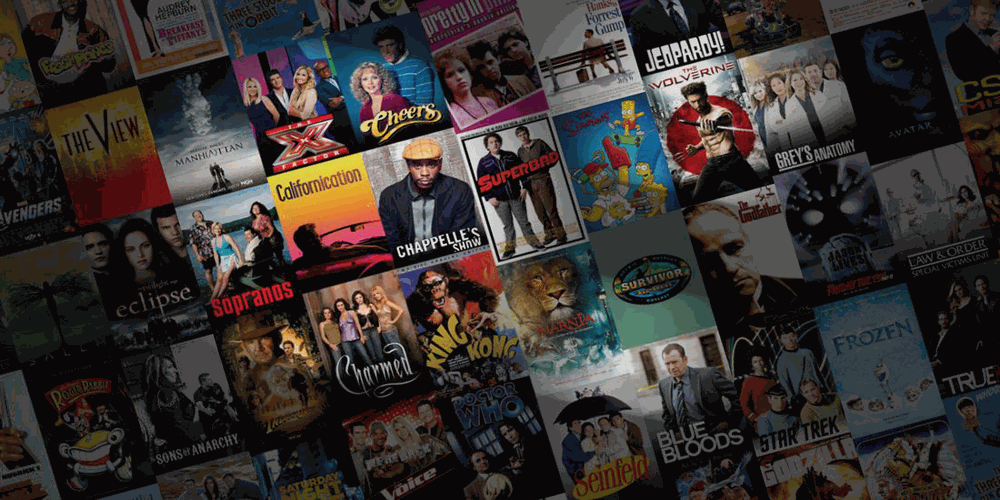

In [1]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('select.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 1000, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif01.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)
from IPython.display import Image
with open('my_gif01.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

## Load Packages

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Regular expressions
import re
import string

# Natural language processing
import nltk
from pprint import PrettyPrinter
from scipy.sparse import hstack
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake  # Rapid Automatic Keyword Extraction algorithm
from PIL import Image
from IPython.display import Image

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from wordcloud import WordCloud
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Miscellaneous
import ast  # To convert the string of list to list
import collections  # Implements specialized container datatypes
import operator  # Implements standard operators as functions

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
# pip install rake_nltk --upgrade
# pip install opencv-python
# pip install wordcloud

In [3]:
pp = PrettyPrinter(indent=4)

## Load Data

In [4]:
# Reading data files
movies_df = pd.read_csv('data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('data/tmdb_5000_credits.csv')

## Examine movies dataset

In [5]:
# Review dataframe shape
movies_df.shape

(4803, 20)

In [6]:
# Display first few rows
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
# Using describe
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
# Review columns
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
# Note: overview has 31 missing values
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                  31
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

## Overview

### Replace 31 NaN Overviews

In [10]:
# checking shape and begin replacing overview data
nan_rows = movies_df[movies_df['overview'].isnull()]
nan_rows.shape

(31, 20)

In [11]:
## star wars
indices_to_fill = 2912
movies_df.loc[indices_to_fill, 'overview'] = "Luke Skywalker joins forces with a Jedi Knight, a cocky pilot, a Wookiee and two droids to save the galaxy from the Empire's world-destroying battle station, while also attempting to rescue Princess Leia from the mysterious Darth Vader."

# The Godfather: Part II
indices_to_fill = 2731
movies_df.loc[indices_to_fill, 'overview'] = "The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate."

# Chiamatemi Francesco - Il Papa della gente
indices_to_fill = 2656
movies_df.loc[indices_to_fill, 'overview'] = "The story of Pope Francis' life."

# The Imitation Game
indices_to_fill = 2522
movies_df.loc[indices_to_fill, 'overview'] = "During World War II, the English mathematical genius Alan Turing tries to crack the German Enigma code with help from fellow mathematicians while attempting to come to terms with his troubled private life."

# spirited away 
indices_to_fill = 2294
movies_df.loc[indices_to_fill, 'overview'] = "During her family's move to the suburbs, a sullen 10-year-old girl wanders into a world ruled by gods, witches and spirits, a world where humans are changed into beasts."

# Back to the Future
indices_to_fill = 2285
movies_df.loc[indices_to_fill, 'overview'] = "Marty McFly, a 17-year-old high school student, is accidentally sent 30 years into the past in a time-traveling DeLorean invented by his close friend, the maverick scientist Doc Brown."

In [12]:
# Food Chains
indices_to_fill = 4431
movies_df.loc[indices_to_fill, 'overview'] = "There is so much interest in food these days yet there is almost no interest in the hands that pick that food. In the US, farm labor has always been one of the most difficult and poorly paid jobs and has relied on some of the nation's most vulnerable people. While the legal restrictions which kept people bound to farms, like slavery, have been abolished, exploitation still exists, ranging from wage theft to modern-day slavery. These days, this exploitation is perpetuated by the corporations at the top of the food chain: supermarkets. Their buying power has kept wages pitifully low and has created a scenario where desperately poor people are willing to put up with anything to keep their jobs."

# whiplash
indices_to_fill = 3865
movies_df.loc[indices_to_fill, 'overview'] = "A promising young drummer enrolls at a cut-throat music conservatory where his dreams of greatness are mentored by an instructor who will stop at nothing to realize a student's potential."

# The godfather
indices_to_fill = 3337
movies_df.loc[indices_to_fill, 'overview'] = "The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son."

# pulp fiction
indices_to_fill = 3232
movies_df.loc[indices_to_fill, 'overview'] = "The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption."

In [13]:
# forrest gump
indices_to_fill = 809
movies_df.loc[indices_to_fill, 'overview'] = "The presidencies of Kennedy and Johnson, the Vietnam War, the Watergate scandal and other historical events unfold from the perspective of an Alabama man with an IQ of 75, whose only desire is to be reunited with his childhood sweetheart."

# se7en
indices_to_fill = 1553
movies_df.loc[indices_to_fill, 'overview'] = "Two detectives, a rookie and a veteran, hunt a serial killer who uses the seven deadly sins as his motives."

# schindler's list
indices_to_fill = 1818
movies_df.loc[indices_to_fill, 'overview'] = "In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis."

# shawshank redemption
indices_to_fill = 1881
movies_df.loc[indices_to_fill, 'overview'] = "Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion."

# The Empire Strikes Back
indices_to_fill = 1990
movies_df.loc[indices_to_fill, 'overview'] = "After the Rebels are overpowered by the Empire, Luke Skywalker begins his Jedi training with Yoda, while his friends are pursued across the galaxy by Darth Vader and bounty hunter Boba Fett."

# The Silence of the Lambs	
indices_to_fill = 2091
movies_df.loc[indices_to_fill, 'overview'] = "A young F.B.I. cadet must receive the help of an incarcerated and manipulative cannibal killer to help catch another serial killer, a madman who skins his victims."

In [14]:
# The Wolf of Wall Street
indices_to_fill = 298
movies_df.loc[indices_to_fill, 'overview'] = "Based on the true story of Jordan Belfort, from his rise to a wealthy stock-broker living the high life to his fall involving crime, corruption and the federal government."

# The Lord of the Rings: The Return of the King
indices_to_fill = 329
movies_df.loc[indices_to_fill, 'overview'] = "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."

# The Lord of the Rings: The Two Towers
indices_to_fill = 330
movies_df.loc[indices_to_fill, 'overview'] = "While Frodo and Sam edge closer to Mordor with the help of the shifty Gollum, the divided fellowship makes a stand against Sauron's new ally, Saruman, and his hordes of Isengard."

# The Lion King
indices_to_fill = 494
movies_df.loc[indices_to_fill, 'overview'] = "Lion prince Simba and his father are targeted by his bitter uncle, who wants to ascend the throne himself."

# the matrix 1994
indices_to_fill = 634
movies_df.loc[indices_to_fill, 'overview'] = "When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence."

# Fight Club
indices_to_fill = 662
movies_df.loc[indices_to_fill, 'overview'] = "An insomniac office worker and a devil-may-care soap maker form an underground fight club that evolves into much more."

# the green mile
indices_to_fill = 690
movies_df.loc[indices_to_fill, 'overview'] = "The lives of guards on Death Row are affected by one of their charges: a black man accused of child murder and rape, yet who has a mysterious gift."


In [15]:
# the Dark Knight
indices_to_fill = 65
movies_df.loc[indices_to_fill, 'overview'] = "When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."

# inside out
indices_to_fill = 77
movies_df.loc[indices_to_fill, 'overview'] = "After young Riley is uprooted from her Midwest life and moved to San Francisco, her emotions - Joy, Fear, Anger, Disgust and Sadness - conflict on how best to navigate a new city, house, and school."

# Guardians of the galaxy
indices_to_fill = 94
movies_df.loc[indices_to_fill, 'overview'] = "A group of intergalactic criminals must pull together to stop a fanatical warrior with plans to purge the universe."

# Intestellar
indices_to_fill = 95
movies_df.loc[indices_to_fill, 'overview'] = "A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival."

# Inception
indices_to_fill = 96
movies_df.loc[indices_to_fill, 'overview'] = "A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster."

# The Lord of the Rings: The Fellowship of the Ring
indices_to_fill = 262
movies_df.loc[indices_to_fill, 'overview'] = "A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron."

# Django Unchained
indices_to_fill = 287
movies_df.loc[indices_to_fill, 'overview'] = "With the help of a German bounty-hunter, a freed slave sets out to rescue his wife from a brutal plantation owner in Mississippi."

In [16]:
nan_rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,NaN,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002
77,175000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://movies.disney.com/inside-out,150540,"[{""id"": 1566, ""name"": ""dream""}, {""id"": 6513, ""...",en,Inside Out,NaN,128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,857611174,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Meet the little voices inside your head.,Inside Out,8.0,6560
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,NaN,481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,NaN,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,NaN,167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752
262,93000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.lordoftherings.net/,120,"[{""id"": 603, ""name"": ""elves""}, {""id"": 604, ""na...",en,The Lord of the Rings: The Fellowship of the Ring,NaN,138.049577,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2001-12-18,871368364,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,8.0,8705
287,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 37, ""name...",http://unchainedmovie.com/,68718,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",en,Django Unchained,NaN,82.121691,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-12-25,425368238,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,7.8,10099
298,100000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.thewolfofwallstreet.com/,106646,"[{""id"": 417, ""name"": ""corruption""}, {""id"": 572...",en,The Wolf of Wall Street,NaN,95.007934,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-12-25,392000694,180.0,"

In [17]:
movies_df.iloc[4140]

budget                                                                  2
genres                                [{"id": 99, "name": "Documentary"}]
homepage                                                              NaN
id                                                                 459488
keywords                [{"id": 6027, "name": "music"}, {"id": 225822,...
original_language                                                      en
original_title                                To Be Frank, Sinatra at 100
overview                                                              NaN
popularity                                                       0.050625
production_companies     [{"name": "Eyeline Entertainment", "id": 60343}]
production_countries     [{"iso_3166_1": "GB", "name": "United Kingdom"}]
release_date                                                   2015-12-12
revenue                                                                 0
runtime                               

In [18]:
# drop this movie with low budget, no ratings, no overview, insufficent data
movies_df = movies_df.drop(index=4140)

In [19]:
nan_rows = movies_df[movies_df['overview'] == '']
nan_rows.shape

(0, 20)

In [20]:
movies_df['overview'].isnull().sum()

0

In [21]:
movies_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [22]:
movies_df['title'][0]

'Avatar'

### Unpack Genres

In [23]:
movies_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
pp.pprint(movies_df['genres'][0])

('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, '
 '"name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')


In [25]:
type(movies_df['genres'][0])

str

In [26]:
# Convert string of list to list
ast.literal_eval(movies_df['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [27]:
# Create function to extract values from a dict
def get_names(lst):
    feat = []
    for i in ast.literal_eval(lst):
        feat.append(i['name'])          # Get the value associated with the key 'name'
    return feat

In [28]:
# Extract genres names
movies_df['genres_names'] = movies_df['genres'].apply(get_names)

In [29]:
type(movies_df['genres_names'][0])

list

In [30]:
movies_df['genres_names'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [31]:
pd.set_option('max_colwidth', None)

In [32]:
movies_df[['genres','genres_names']].head()

,genres,genres_names
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]","[Action, Adventure, Fantasy, Science Fiction]"
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","[Adventure, Fantasy, Action]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]","[Action, Adventure, Crime]"
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}]","[Action, Crime, Drama, Thriller]"
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]","[Action, Adventure, Science Fiction]"


### Unpack Production Companies

In [33]:
movies_df['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [34]:
pp.pprint(movies_df['production_companies'][0])

('[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century '
 'Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": '
 '444}, {"name": "Lightstorm Entertainment", "id": 574}]')


In [35]:
type(movies_df['production_companies'][0])

str

In [36]:
# Convert string of list to list
ast.literal_eval(movies_df['production_companies'][0])

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [37]:
# Create function to extract values from a dict
def get_names(lst):
    feat = []
    for i in ast.literal_eval(lst):
        feat.append(i['name'])          # Get the value associated with the key 'name'
    return feat

In [38]:
# Extract genres names
movies_df['production_companies_unpacked'] = movies_df['production_companies'].apply(get_names)

In [39]:
type(movies_df['production_companies_unpacked'][0])

list

In [40]:
movies_df['production_companies_unpacked'][0]

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

In [41]:
pd.set_option('max_colwidth', None)

In [42]:
movies_df[['genres','genres_names']].head()

,genres,genres_names
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]","[Action, Adventure, Fantasy, Science Fiction]"
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","[Adventure, Fantasy, Action]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]","[Action, Adventure, Crime]"
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}]","[Action, Crime, Drama, Thriller]"
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]","[Action, Adventure, Science Fiction]"


In [43]:
type(movies_df.genres_names[0])

list

### Unpack Keywords

In [44]:
# Convert string of list to list
ast.literal_eval(movies_df['keywords'][0])

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [45]:
pp.pprint(movies_df['keywords'][0])

('[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, '
 '{"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, '
 '{"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, '
 '{"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": '
 '9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": '
 '"tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": '
 '"cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, '
 '{"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, '
 '{"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power '
 'relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": '
 '"3d"}]')


In [46]:
type(movies_df['keywords'][0])

str

In [47]:
# Extract genres names
movies_df['keywords_unpacked'] = movies_df['keywords'].apply(get_names)

In [48]:
type(movies_df['keywords_unpacked'][0])

list

In [49]:
movies_df['keywords_unpacked'][0]


['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

## Examine credits dataset

In [50]:
# Review dataframe shape
credits_df.shape

(4803, 4)

In [51]:
# Allow strings to show full length and not get cut off
pd.set_option('max_colwidth', 500)

In [52]:
# Display first few rows
credits_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": 2, ""id"": 65731, ""name"": ""Sam Worthington"", ""order"": 0}, {""cast_id"": 3, ""character"": ""Neytiri"", ""credit_id"": ""52fe48009251416c750ac9cb"", ""gender"": 1, ""id"": 8691, ""name"": ""Zoe Saldana"", ""order"": 1}, {""cast_id"": 25, ""character"": ""Dr. Grace Augustine"", ""credit_id"": ""52fe48009251416c750aca39"", ""gender"": 1, ""id"": 10205, ""name"": ""Sigourney Weaver"", ""order"": 2}, {""cast_id"": 4, ""character"": ""Col. Quaritch""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""job"": ""Editor"", ""name"": ""Stephen E. Rivkin""}, {""credit_id"": ""539c47ecc3a36810e3001f87"", ""department"": ""Art"", ""gender"": 2, ""id"": 496, ""job"": ""Production Design"", ""name"": ""Rick Carter""}, {""credit_id"": ""54491c89c3a3680fb4001cf7"", ""department"": ""Sound"", ""gender"": 0, ""id"": 900, ""job"": ""Sound Designer"", ""name"": ""Christopher Boyes""}, {""credit_id"": ""54491cb70e0a267480001bd0"", ""department"": ""Sound"", ""gender""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""gender"": 2, ""id"": 85, ""name"": ""Johnny Depp"", ""order"": 0}, {""cast_id"": 5, ""character"": ""Will Turner"", ""credit_id"": ""52fe4232c3a36847f800b511"", ""gender"": 2, ""id"": 114, ""name"": ""Orlando Bloom"", ""order"": 1}, {""cast_id"": 6, ""character"": ""Elizabeth Swann"", ""credit_id"": ""52fe4232c3a36847f800b515"", ""gender"": 1, ""id"": 116, ""name"": ""Keira Knightley"", ""order"": 2}, {""cast_id"": 12, ""character"": ""William \""Boots...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job"": ""Director of Photography"", ""name"": ""Dariusz Wolski""}, {""credit_id"": ""52fe4232c3a36847f800b4fd"", ""department"": ""Directing"", ""gender"": 2, ""id"": 1704, ""job"": ""Director"", ""name"": ""Gore Verbinski""}, {""credit_id"": ""52fe4232c3a36847f800b54f"", ""department"": ""Production"", ""gender"": 2, ""id"": 770, ""job"": ""Producer"", ""name"": ""Jerry Bruckheimer""}, {""credit_id"": ""52fe4232c3a36847f800b503"", ""department"": ""Writ..."


In [53]:
# Using describe
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [54]:
# Review columns
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [55]:
credits_df.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [56]:
credits_df['title'][0]

'Avatar'

### Extract Movie Characters from "Cast" Field

In [57]:
pp.pprint(credits_df['cast'][0])

('[{"cast_id": 242, "character": "Jake Sully", "credit_id": '
 '"5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam '
 'Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", '
 '"credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": '
 '"Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace '
 'Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": '
 '10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": '
 '"Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": '
 '32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": '
 '"Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": '
 '17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, '
 '"character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": '
 '2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, '
 '"character": "Norm Spellman"

In [58]:
ast.literal_eval(credits_df['cast'][0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [59]:
# Convert string of list to list
ast.literal_eval(credits_df['cast'][0])

# Create function to extract values from a dict
def get_names(lst):
    feat = []
    for i in ast.literal_eval(lst):
        feat.append(i['character'])          # Get the value associated with the key 'name'
    return feat

# Extract genres names
credits_df['character'] = credits_df['cast'].apply(get_names)

type(credits_df['character'][0])

credits_df['character'][0]

credits_df[['cast','character']].head(2)

,cast,character
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": 2, ""id"": 65731, ""name"": ""Sam Worthington"", ""order"": 0}, {""cast_id"": 3, ""character"": ""Neytiri"", ""credit_id"": ""52fe48009251416c750ac9cb"", ""gender"": 1, ""id"": 8691, ""name"": ""Zoe Saldana"", ""order"": 1}, {""cast_id"": 25, ""character"": ""Dr. Grace Augustine"", ""credit_id"": ""52fe48009251416c750aca39"", ""gender"": 1, ""id"": 10205, ""name"": ""Sigourney Weaver"", ""order"": 2}, {""cast_id"": 4, ""character"": ""Col. Quaritch""...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col. Quaritch, Trudy Chacon, Selfridge, Norm Spellman, Moat, Eytukan, Tsu'Tey, Dr. Max Patel, Lyle Wainfleet, Private Fike, Cryo Vault Med Tech, Venture Star Crew Chief, Lock Up Trooper, Shuttle Pilot, Shuttle Co-Pilot, Shuttle Crew Chief, Tractor Operator / Troupe, Dragon Gunship Pilot, Dragon Gunship Gunner, Dragon Gunship Navigator, Suit #1, Suit #2, Ambient Room Tech, Ambient Room Tech / Troupe, Horse Clan Leader, Link Room Tech, Basketball Avat..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""gender"": 2, ""id"": 85, ""name"": ""Johnny Depp"", ""order"": 0}, {""cast_id"": 5, ""character"": ""Will Turner"", ""credit_id"": ""52fe4232c3a36847f800b511"", ""gender"": 2, ""id"": 114, ""name"": ""Orlando Bloom"", ""order"": 1}, {""cast_id"": 6, ""character"": ""Elizabeth Swann"", ""credit_id"": ""52fe4232c3a36847f800b515"", ""gender"": 1, ""id"": 116, ""name"": ""Keira Knightley"", ""order"": 2}, {""cast_id"": 12, ""character"": ""William \""Boots...","[Captain Jack Sparrow, Will Turner, Elizabeth Swann, William ""Bootstrap Bill"" Turner, Captain Sao Feng, Captain Davy Jones, Captain Hector Barbossa, Admiral James Norrington, Joshamee Gibbs, Lord Cutler Beckett, Tia Dalma, Governor Weatherby Swann, Captain Teague Sparrow, Pintel, Ragetti, Lieutenant Theodore Groves, Cotton, Marty, Ian Mercer, Scarlett, Giselle, Mullroy, Murtogg, Tai Huang, Henry Turner, Mistress Ching, Lieutenant Greitzer, Hadras, Clacker, Penrod, Cotton's Parrot (voice), Ca..."


### Extract Actors from "Cast" Field

In [60]:
# Convert string of list to list
ast.literal_eval(credits_df['cast'][0])

# Create function to extract values from a dict
def get_names(lst):
    feat = []
    for i in ast.literal_eval(lst):
        feat.append(i['name'])          # Get the value associated with the key 'name'
    return feat

# Extract genres names
credits_df['actors'] = credits_df['cast'].apply(get_names)

type(credits_df['actors'][0])

credits_df['actors'][0]

credits_df[['cast','actors']].head(2)

,cast,actors
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": 2, ""id"": 65731, ""name"": ""Sam Worthington"", ""order"": 0}, {""cast_id"": 3, ""character"": ""Neytiri"", ""credit_id"": ""52fe48009251416c750ac9cb"", ""gender"": 1, ""id"": 8691, ""name"": ""Zoe Saldana"", ""order"": 1}, {""cast_id"": 25, ""character"": ""Dr. Grace Augustine"", ""credit_id"": ""52fe48009251416c750aca39"", ""gender"": 1, ""id"": 10205, ""name"": ""Sigourney Weaver"", ""order"": 2}, {""cast_id"": 4, ""character"": ""Col. Quaritch""...","[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso, Dileep Rao, Matt Gerald, Sean Anthony Moran, Jason Whyte, Scott Lawrence, Kelly Kilgour, James Patrick Pitt, Sean Patrick Murphy, Peter Dillon, Kevin Dorman, Kelson Henderson, David Van Horn, Jacob Tomuri, Michael Blain-Rozgay, Jon Curry, Luke Hawker, Woody Schultz, Peter Mensah, Sonia Yee, Jahnel Curfman, Ilram Choi, Kyla Warren, Lisa Roum..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""gender"": 2, ""id"": 85, ""name"": ""Johnny Depp"", ""order"": 0}, {""cast_id"": 5, ""character"": ""Will Turner"", ""credit_id"": ""52fe4232c3a36847f800b511"", ""gender"": 2, ""id"": 114, ""name"": ""Orlando Bloom"", ""order"": 1}, {""cast_id"": 6, ""character"": ""Elizabeth Swann"", ""credit_id"": ""52fe4232c3a36847f800b515"", ""gender"": 1, ""id"": 116, ""name"": ""Keira Knightley"", ""order"": 2}, {""cast_id"": 12, ""character"": ""William \""Boots...","[Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoffrey Rush, Jack Davenport, Kevin McNally, Tom Hollander, Naomie Harris, Jonathan Pryce, Keith Richards, Lee Arenberg, Mackenzie Crook, Greg Ellis, David Bailie, Martin Klebba, David Schofield, Lauren Maher, Vanessa Branch, Angus Barnett, Giles New, Reggie Lee, Dominic Scott Kay, Takayo Fischer, David Meunier, Ho-Kwan Tse, Andy Beckwith, Peter Donald Badalamenti II, Christopher S. Capp, Keith Richar..."


### Unpack Crew

In [61]:
pp.pprint(credits_df['crew'][0])

('[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", '
 '"gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, '
 '{"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, '
 '"id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": '
 '"54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, '
 '"job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": '
 '"54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, '
 '"job": "Supervising Sound Editor", "name": "Christopher Boyes"}, '
 '{"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", '
 '"gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, '
 '{"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": '
 '2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, '
 '{"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", '
 '"gender": 2, "id

In [62]:
ast.literal_eval(credits_df['crew'][0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [63]:
for i in ast.literal_eval(credits_df['crew'][0]):
    print(i['job'])

Editor
Production Design
Sound Designer
Supervising Sound Editor
Casting
Original Music Composer
Director
Writer
Editor
Producer
Screenplay
Art Direction
Visual Effects Producer
Casting
Supervising Art Director
Music Editor
Sound Effects Editor
Foley
Foley
Costume Design
Producer
Art Direction
Set Decoration
Supervising Art Director
Set Designer
Executive Producer
Costume Design
Director of Photography
Set Designer
Stunts
Makeup Artist
Hairstylist
Camera Operator
Art Direction
Visual Effects Supervisor
Visual Effects Editor
Editor
Set Designer
Director of Photography
Stunts
Visual Effects Supervisor
Dialect Coach
Art Direction
Art Direction
Art Direction
Motion Capture Artist
Stunt Coordinator
Visual Effects Supervisor
Supervising Art Director
Supervising Art Director
Casting
Production Design
Costume Design
Steadicam Operator
Makeup Department Head
Visual Effects Producer
Visual Effects Supervisor
Post Production Supervisor
Visual Effects Supervisor
Makeup Artist
Costume Supervisor
Vi

In [64]:
def get_director(lst):
    feat = []
    for i in ast.literal_eval(lst):
        if i['job'].lower() =='director':
            feat.append(i['name'])          
    return feat

In [65]:
credits_df['director'] = credits_df['crew'].apply(get_director)
pd.set_option('max_colwidth', None)
credits_df[['director']].head(1)

,director
0,[James Cameron]


In [66]:
# Allow strings to show full length and not get cut off
pd.set_option('max_colwidth', 500)

In [67]:
credits_df.head(1)

,movie_id,title,cast,crew,character,actors,director
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": 2, ""id"": 65731, ""name"": ""Sam Worthington"", ""order"": 0}, {""cast_id"": 3, ""character"": ""Neytiri"", ""credit_id"": ""52fe48009251416c750ac9cb"", ""gender"": 1, ""id"": 8691, ""name"": ""Zoe Saldana"", ""order"": 1}, {""cast_id"": 25, ""character"": ""Dr. Grace Augustine"", ""credit_id"": ""52fe48009251416c750aca39"", ""gender"": 1, ""id"": 10205, ""name"": ""Sigourney Weaver"", ""order"": 2}, {""cast_id"": 4, ""character"": ""Col. Quaritch""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""job"": ""Editor"", ""name"": ""Stephen E. Rivkin""}, {""credit_id"": ""539c47ecc3a36810e3001f87"", ""department"": ""Art"", ""gender"": 2, ""id"": 496, ""job"": ""Production Design"", ""name"": ""Rick Carter""}, {""credit_id"": ""54491c89c3a3680fb4001cf7"", ""department"": ""Sound"", ""gender"": 0, ""id"": 900, ""job"": ""Sound Designer"", ""name"": ""Christopher Boyes""}, {""credit_id"": ""54491cb70e0a267480001bd0"", ""department"": ""Sound"", ""gender""...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col. Quaritch, Trudy Chacon, Selfridge, Norm Spellman, Moat, Eytukan, Tsu'Tey, Dr. Max Patel, Lyle Wainfleet, Private Fike, Cryo Vault Med Tech, Venture Star Crew Chief, Lock Up Trooper, Shuttle Pilot, Shuttle Co-Pilot, Shuttle Crew Chief, Tractor Operator / Troupe, Dragon Gunship Pilot, Dragon Gunship Gunner, Dragon Gunship Navigator, Suit #1, Suit #2, Ambient Room Tech, Ambient Room Tech / Troupe, Horse Clan Leader, Link Room Tech, Basketball Avat...","[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso, Dileep Rao, Matt Gerald, Sean Anthony Moran, Jason Whyte, Scott Lawrence, Kelly Kilgour, James Patrick Pitt, Sean Patrick Murphy, Peter Dillon, Kevin Dorman, Kelson Henderson, David Van Horn, Jacob Tomuri, Michael Blain-Rozgay, Jon Curry, Luke Hawker, Woody Schultz, Peter Mensah, Sonia Yee, Jahnel Curfman, Ilram Choi, Kyla Warren, Lisa Roum...",[James Cameron]


### Merge Datasets

In [68]:
# Merge movie and credits dataset
merged_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', suffixes=('_movies.df', '_credits.df'))

In [69]:
pd.set_option('max_colwidth', 100)
merged_df.head(1)
print(merged_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_movies.df',
       'vote_average', 'vote_count', 'genres_names',
       'production_companies_unpacked', 'keywords_unpacked', 'movie_id',
       'title_credits.df', 'cast', 'crew', 'character', 'actors', 'director'],
      dtype='object')


In [70]:
# save the dataframe to a CSV file to use in new notebook
merged_df.to_csv('merged_df.csv', index=False)

## EDA Visualizations

### Weighted Ratings

In [71]:
C= movies_df['vote_average'].mean()
m= movies_df['vote_count'].quantile(0.9)

In [72]:
count_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
count_movies.shape

(481, 23)

In [73]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [74]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
count_movies['score'] = count_movies.apply(weighted_rating, axis=1)

In [75]:
#Sort movies based on score calculated above
count_movies = count_movies.sort_values('score', ascending=False)

#Print the top 10 movies
count_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059333
662,Fight Club,9413,8.3,7.939332
65,The Dark Knight,12002,8.2,7.920083
3232,Pulp Fiction,8428,8.3,7.904731
96,Inception,13752,8.1,7.863298
3337,The Godfather,5893,8.4,7.851356
95,Interstellar,10867,8.1,7.809554
809,Forrest Gump,7927,8.2,7.803286
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727346
1990,The Empire Strikes Back,5879,8.2,7.698020


### Movie Popularity

Text(0.5, 1.0, 'Popular Movies')

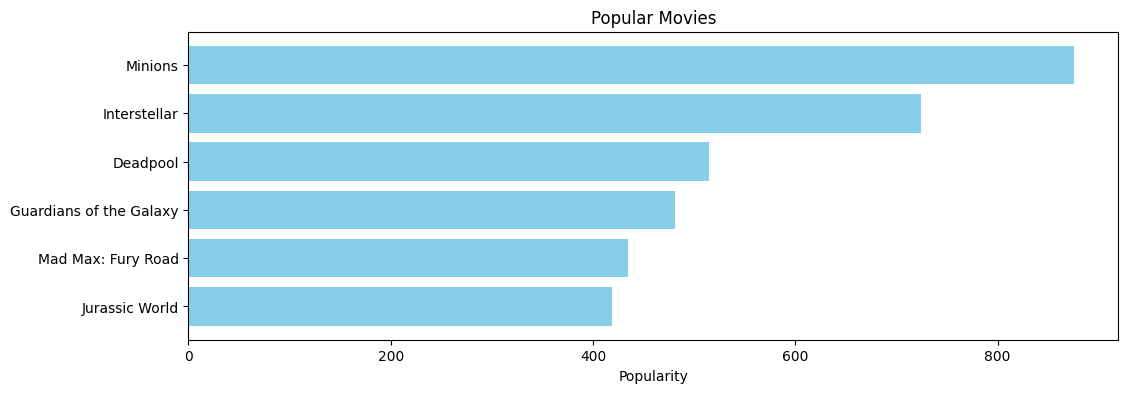

In [76]:
pop= movies_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## WordCloud Keywords

In [77]:
print('Datatype: ', type(merged_df['keywords_unpacked']))

Datatype:  <class 'pandas.core.series.Series'>


In [78]:
# Turn series into string to input into wordcloud
keywords_unpacked_list = merged_df['keywords_unpacked'].tolist()
keywords_unpacked_string = ', '.join(' '.join(alist) for alist in keywords_unpacked_list)
type(keywords_unpacked_string)

str

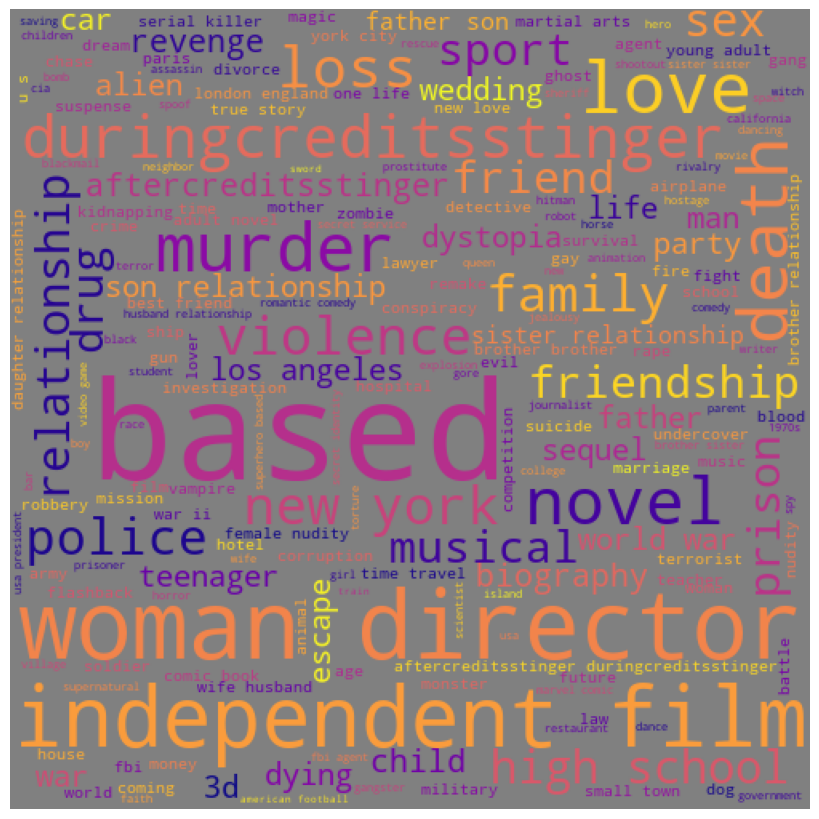

In [79]:
wordcloud = WordCloud(width=500, height=500, background_color='grey', max_words=200, colormap='plasma').generate(keywords_unpacked_string)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Movie Runtimes

In [80]:
type(merged_df[['runtime']])

pandas.core.frame.DataFrame

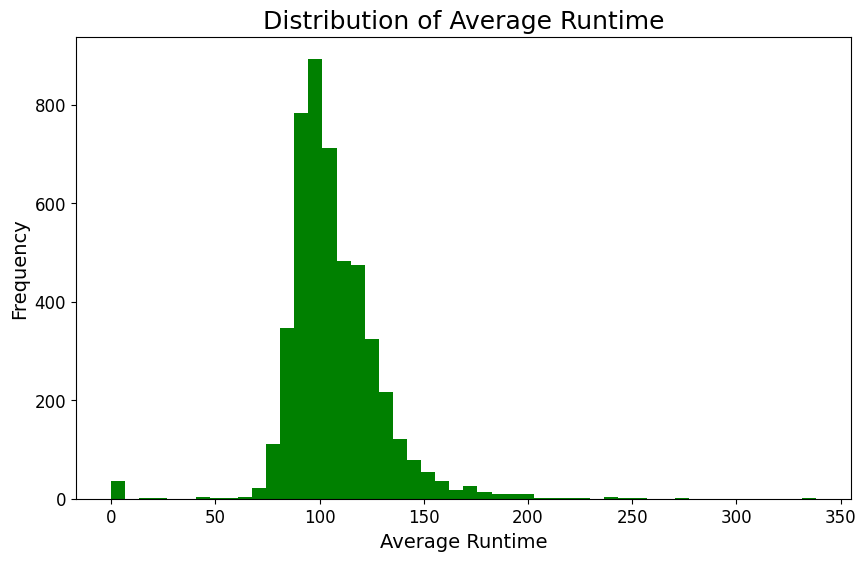

In [81]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

plt.hist(merged_df['runtime'], bins=50, color='green')

plt.title("Distribution of Average Runtime", fontsize=18)
plt.xlabel("Average Runtime", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Average Vote Scores

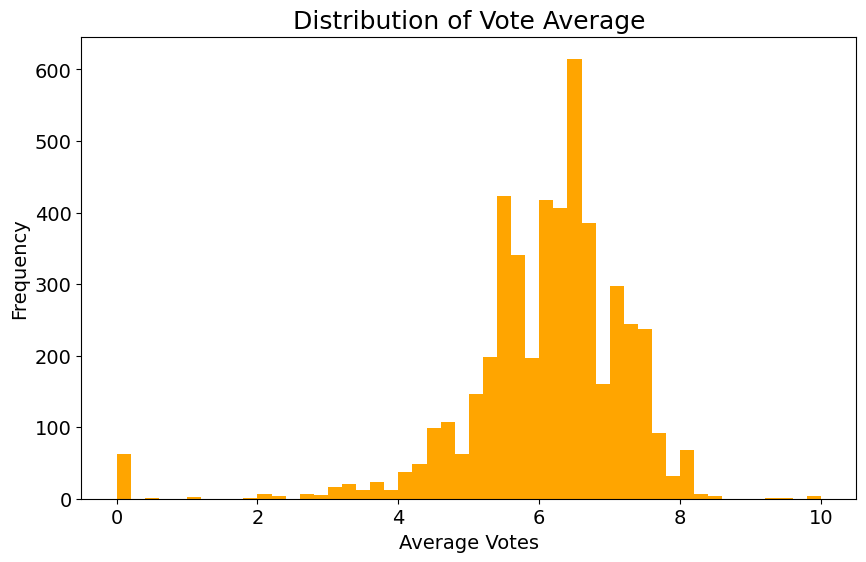

In [82]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

plt.hist(merged_df['vote_average'], bins=50, color='orange')
plt.tick_params(axis='both', which='major', labelsize=14)  # Set the font size of the tick labels
plt.title("Distribution of Vote Average", fontsize=18)
plt.xlabel("Average Votes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

### Average Vote Count

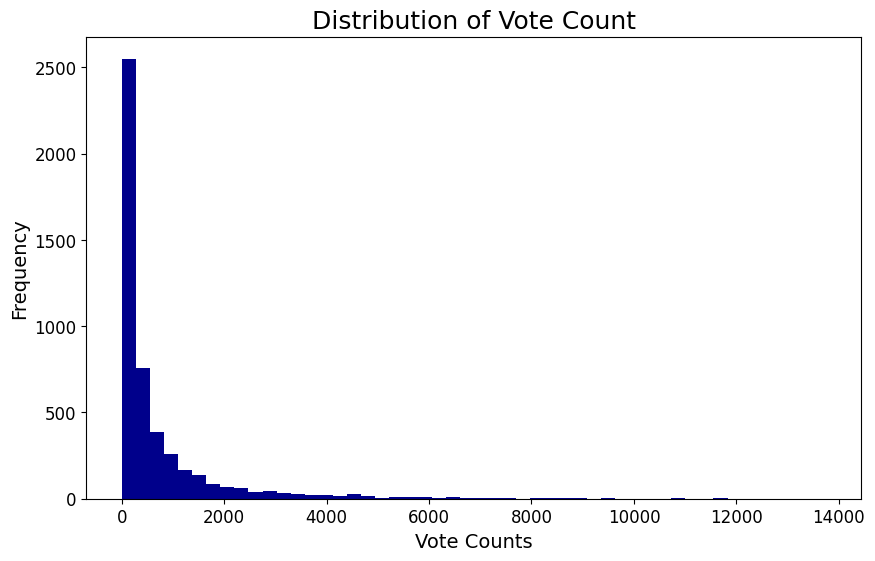

In [83]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

plt.hist(merged_df['vote_count'], bins=50, color='darkblue')  # Set the color of the histogram

plt.title("Distribution of Vote Count", fontsize=18)  # Set the font size of the title
plt.xlabel("Vote Counts", fontsize=14)  # Set the font size of the x-axis label
plt.ylabel("Frequency", fontsize=14)  # Set the font size of the y-axis label

plt.tick_params(axis='both', which='major', labelsize=12)  # Set the font size of the tick labels

plt.show()

## Spoken Languages

In [84]:
# Top ten original languages in the movie dataset
merged_df.original_language.value_counts()[0:10]

en    4504
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
Name: original_language, dtype: int64

## Reviewing Token Frequency Distributions

### Review token (vocabulary) frequency distribution before removing stop words

In [85]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)  ### Review token (vocabulary) frequency distribution after removing stop words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(merged_df['overview'], 20)
print('Top 20 words in movies overview before removing stop words')
common_words

Top 20 words in movies overview before removing stop words


[('the', 13908),
 ('to', 7949),
 ('and', 7440),
 ('of', 6899),
 ('in', 4545),
 ('his', 4002),
 ('is', 3371),
 ('with', 2539),
 ('he', 2270),
 ('her', 2157),
 ('an', 1882),
 ('for', 1852),
 ('on', 1842),
 ('that', 1721),
 ('their', 1616),
 ('who', 1532),
 ('as', 1499),
 ('when', 1467),
 ('by', 1440),
 ('from', 1329)]

### Review token (vocabulary) frequency distribution after removing stop words

In [86]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(merged_df['overview'],20)### Review token (vocabulary) frequency distribution after removing stop words'], 20)
print('Top 20 words in movies overview after removing stop words')
common_words

Top 20 words in movies overview after removing stop words


[('life', 871),
 ('new', 716),
 ('young', 634),
 ('world', 633),
 ('man', 584),
 ('family', 539),
 ('story', 449),
 ('love', 429),
 ('old', 372),
 ('father', 360),
 ('years', 350),
 ('time', 346),
 ('finds', 330),
 ('friends', 321),
 ('help', 316),
 ('film', 313),
 ('town', 310),
 ('year', 309),
 ('school', 306),
 ('lives', 300)]

### Bigrams frequency distribution before removing stop words

In [87]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(merged_df['overview'],20) ### Bigrams frequency distribution after removing stop words### Bigrams frequency distribution after removing stop words'], 20
print('Top 20 bigrams in movies overview before removing stop words')
common_words

Top 20 bigrams in movies overview before removing stop words


[('of the', 1296),
 ('in the', 1186),
 ('to the', 590),
 ('on the', 566),
 ('and the', 517),
 ('with the', 475),
 ('of his', 406),
 ('and his', 395),
 ('from the', 338),
 ('for the', 317),
 ('to be', 315),
 ('by the', 313),
 ('with his', 282),
 ('the world', 274),
 ('at the', 264),
 ('story of', 263),
 ('as the', 250),
 ('to find', 241),
 ('into the', 214),
 ('is the', 214)]

### Bigrams & Trigrams frequency distribution after removing stop words

In [88]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(merged_df['overview'],20)### Bigrams frequency distribution after removing stop words'], 20 = bag_of_words.sum(axis=0) 
print('Top 20 bigrams in movies overview after removing stop words')
common_words

Top 20 bigrams in movies overview after removing stop words


[('new york', 211),
 ('year old', 188),
 ('high school', 130),
 ('los angeles', 88),
 ('small town', 79),
 ('world war', 74),
 ('york city', 73),
 ('true story', 73),
 ('best friend', 69),
 ('young man', 68),
 ('young woman', 52),
 ('falls love', 51),
 ('war ii', 48),
 ('tells story', 47),
 ('united states', 47),
 ('years later', 46),
 ('young boy', 35),
 ('fbi agent', 32),
 ('true love', 31),
 ('best friends', 30)]

In [89]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(merged_df['overview'], 20)
print('Top 20 trigrams in movies overview after removing stop words')
common_words### Trigrams frequency distribution after removing stop words

Top 20 trigrams in movies overview after removing stop words


[('new york city', 73),
 ('world war ii', 47),
 ('based true story', 21),
 ('year old boy', 16),
 ('year old girl', 15),
 ('10 year old', 14),
 ('year old son', 13),
 ('12 year old', 13),
 ('17 year old', 13),
 ('16 year old', 11),
 ('year old daughter', 10),
 ('high school student', 9),
 ('comes face face', 8),
 ('14 year old', 8),
 ('president united states', 8),
 ('life turned upside', 8),
 ('15 year old', 8),
 ('18 year old', 8),
 ('19 year old', 7),
 ('11 year old', 7)]

# Preprocess Data

In [90]:
# Allow strings to show full length and not get cut off
pd.set_option('max_colwidth', 100)

In [91]:
# Define stop words list
stopwords = nltk.corpus.stopwords.words('english')     # All English Stopwords

# Instantiate Porter stemmer
ps = nltk.PorterStemmer()

In [92]:
print(merged_df.columns)
merged_df.head(3)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_movies.df',
       'vote_average', 'vote_count', 'genres_names',
       'production_companies_unpacked', 'keywords_unpacked', 'movie_id',
       'title_credits.df', 'cast', 'crew', 'character', 'actors', 'director'],
      dtype='object')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,genres_names,production_companies_unpacked,keywords_unpacked,movie_id,title_credits.df,cast,crew,character,actors,director
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm...","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa...",19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col. Quaritch, Trudy Chacon, Selfridge, Norm Spellman...","[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribi...",[James Cameron]
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]","[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, ship...",285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""...","[Captain Jack Sparrow, Will Turner, Elizabeth Swann, William ""Bootstrap Bill"" Turner, Captain Sa...","[Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoff...",[Gore Verbinski]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...",...,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[spy, based on novel, secret agent, sequel, mi6, british secret service, united kingdom]",206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, Moneypenny, Hinx, C, Tanner, Mr. White, Marco Scia...","[Daniel Craig, Christoph Waltz, Léa Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie...",[Sam Mendes]


In [93]:
# Create function to clean_text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text_2 = ' '.join(word for word in text)
    return text_2

In [94]:
# Apply clean_text function to clean movie description field
merged_df['title_clean'] = merged_df['title_credits.df'].apply(clean_text)

# Apply clean_text function to clean movie description field
merged_df['overview_clean'] = merged_df['overview'].apply(clean_text)
merged_df.head(2)



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,keywords_unpacked,movie_id,title_credits.df,cast,crew,character,actors,director,title_clean,overview_clean
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,"[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa...",19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col. Quaritch, Trudy Chacon, Selfridge, Norm Spellman...","[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribi...",[James Cameron],avatar,22nd centuri parapleg marin dispatch moon pandora uniqu mission becom torn follow order protect ...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,"[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, ship...",285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""...","[Captain Jack Sparrow, Will Turner, Elizabeth Swann, William ""Bootstrap Bill"" Turner, Captain Sa...","[Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoff...",[Gore Verbinski],pirat caribbean world end,captain barbossa long believ dead come back life head edg earth turner elizabeth swann noth quit...


## Clean Columns with List Data

In [95]:
# preprocess list data types
def clean_list(text):
    text = str(text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text_2 = ' '.join(word for word in text)
    return text_2

In [96]:
merged_df['keywords_clean'] = merged_df['keywords_unpacked'].apply(clean_list)
merged_df['character_clean'] = merged_df['character'].apply(clean_list)
merged_df['actors_clean'] = merged_df['actors'].apply(clean_list)
merged_df['genres_clean'] = merged_df['genres_names'].apply(clean_list)
merged_df['director_clean'] = merged_df['director'].apply(clean_list)
merged_df['production_companies_clean'] = merged_df['production_companies_unpacked'].apply(clean_list)
merged_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,actors,director,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,"[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribi...",[James Cameron],avatar,22nd centuri parapleg marin dispatch moon pandora uniqu mission becom torn follow order protect ...,cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe...,jake sulli neytiri dr grace augustin col quaritch trudi chacon selfridg norm spellman moat eytuk...,sam worthington zoe saldana sigourney weaver stephen lang michel rodriguez giovanni ribisi joel ...,action adventur fantasi scienc fiction,jame cameron,ingeni film partner twentieth centuri fox film corpor dune entertain lightstorm entertain
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,"[Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoff...",[Gore Verbinski],pirat caribbean world end,captain barbossa long believ dead come back life head edg earth turner elizabeth swann noth quit...,ocean drug abus exot island east india trade compani love one life traitor shipwreck strong woma...,captain jack sparrow turner elizabeth swann william bootstrap bill turner captain sao feng capta...,johnni depp orlando bloom keira knightley stellan skarsgård chow yunfat bill nighi geoffrey rush...,adventur fantasi action,gore verbinski,walt disney pictur jerri bruckheim film second mate product


In [97]:
# there are 412 movies without keywords
# we decide to leave them
merged_df[merged_df['keywords_clean'] == ''].head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,actors,director,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean
71,145000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 14, ""name"": ""Fantasy""}]",http://www.themummy.com/,1735,[],en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China, pitting him against an emperor from the 2,000-yea...",60.034162,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""name"": ""China Film Co-Production Corporation"", ""id""...",...,"[Brendan Fraser, Jet Li, John Hannah, Maria Bello, Luke Ford, Michelle Yeoh, Isabella Leong, Ant...",[Rob Cohen],mummi tomb dragon emperor,archaeologist rick oconnel travel china pit emperor 2000yearold han dynasti who return dead purs...,,richard oconnel emperor han jonathan carnahan evelyn connel alex oconnel zi juan lin gener yang ...,brendan fraser jet li john hannah maria bello luke ford michel yeoh isabella leong anthoni wong ...,adventur action fantasi,rob cohen,univers pictur china film coproduct corpor rel media alphavil film sommer compani
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adventure film. Helmed by Roland Joffé from a story by...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bliss Media"", ""id"": 8186}, {""name"": ""Limelight Intern...",...,"[Josh Hartnett, Simone Kessell, Tamsin Egerton, Alice Englert, Bipasha Basu, Abhay Deol, Tehmina...",[Roland Joffé],lover,lover epic romanc time travel adventur film helm roland joffé stori ajey jhankar film sweep tale...,,jame stewart jay fennel clara coldstream laura fennel dolli tulaja naik udaji sonubai governor b...,josh hartnett simon kessel tamsin egerton alic englert bipasha basu abhay deol tehmina sunni sha...,action adventur scienc fiction romanc,roland joffé,corsan bliss media limelight intern media entertain neelmudra entertain aristo film singular pro...
323,100000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",http://www.sexandthecitymovie.com/,37786,[],en,Sex and the City 2,"Carrie, Charlotte, and Miranda are all married now, but they're still up for a little fun in the...",18.325897,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name"": ""Village Roadshow Pictures"", ""id"": 79}, {""name""...",...,"[Sarah Jessica Parker, Kristin Davis, Cynthia Nixon, Kim Cattrall, Chris Noth, David Eigenberg, ...",[Michael Patrick King],sex citi 2,carri charlott miranda marri theyr still littl fun sun samantha get chanc visit one extravag vac...,,carri bradshaw charlott york miranda hobb samantha jone mr big steve bradi harri goldenblatt lil...,sarah jessica parker kristin davi cynthia nixon kim cattral chri noth david eigenberg evan handl...,comedi drama romanc,michael patrick king,new line cinema villag roadshow pictur home box offic hbo hbo film


In [98]:
# Create function to lookup and print movie overview by index
def print_keywords(index):
    example = merged_df[merged_df.index == index][['keywords_clean', 'original_title']].values[0]
    if len(example) > 0:
        print('Name:', example[1])
        print('Keywords:', example[0])

In [99]:
# this is what it looks like after preprocessing
print_keywords(4200)

Name: From Here to Eternity
Keywords: hawaii harass pearl harbor bomb militari life armi base


In [100]:
# save what we have so far 
merged_df.to_csv('vect_df.csv', index=False)

## Load newly created data file

In [101]:
vect_df = pd.read_csv('vect_df.csv')
vect_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,actors,director,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,"['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Gi...",['James Cameron'],avatar,22nd centuri parapleg marin dispatch moon pandora uniqu mission becom torn follow order protect ...,cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe...,jake sulli neytiri dr grace augustin col quaritch trudi chacon selfridg norm spellman moat eytuk...,sam worthington zoe saldana sigourney weaver stephen lang michel rodriguez giovanni ribisi joel ...,action adventur fantasi scienc fiction,jame cameron,ingeni film partner twentieth centuri fox film corpor dune entertain lightstorm entertain
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,"['Johnny Depp', 'Orlando Bloom', 'Keira Knightley', 'Stellan Skarsgård', 'Chow Yun-fat', 'Bill N...",['Gore Verbinski'],pirat caribbean world end,captain barbossa long believ dead come back life head edg earth turner elizabeth swann noth quit...,ocean drug abus exot island east india trade compani love one life traitor shipwreck strong woma...,captain jack sparrow turner elizabeth swann william bootstrap bill turner captain sao feng capta...,johnni depp orlando bloom keira knightley stellan skarsgård chow yunfat bill nighi geoffrey rush...,adventur fantasi action,gore verbinski,walt disney pictur jerri bruckheim film second mate product
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...",...,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydoux', 'Ralph Fiennes', 'Monica Bellucci', 'Ben Whis...",['Sam Mendes'],spectr,cryptic messag bond past send trail uncov sinist organ battl polit forc keep secret servic aliv ...,spi base novel secret agent sequel mi6 british secret servic unit kingdom,jame bond blofeld madelein lucia q moneypenni hinx c tanner mr white marco sciarra estrella mexi...,daniel craig christoph waltz léa seydoux ralph fienn monica bellucci ben whishaw naomi harri dav...,action adventur crime,sam mend,columbia pictur danjaq b24
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"

In [102]:
print(vect_df.columns)

# drop columns we definitely won't use anymore
merged_df = vect_df.drop(['actors', 'cast', 'character', 'crew', 
                       'director', 'genres', 'genres_names', 'homepage', 
                       'id', 'keywords', 'keywords_unpacked', 'movie_id', 
                       'overview', 'spoken_languages', 'status', 'title_movies.df', 'production_companies',
                         'production_countries', 'production_companies_unpacked'], axis=1)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_movies.df',
       'vote_average', 'vote_count', 'genres_names',
       'production_companies_unpacked', 'keywords_unpacked', 'movie_id',
       'title_credits.df', 'cast', 'crew', 'character', 'actors', 'director',
       'title_clean', 'overview_clean', 'keywords_clean', 'character_clean',
       'actors_clean', 'genres_clean', 'director_clean',
       'production_companies_clean'],
      dtype='object')


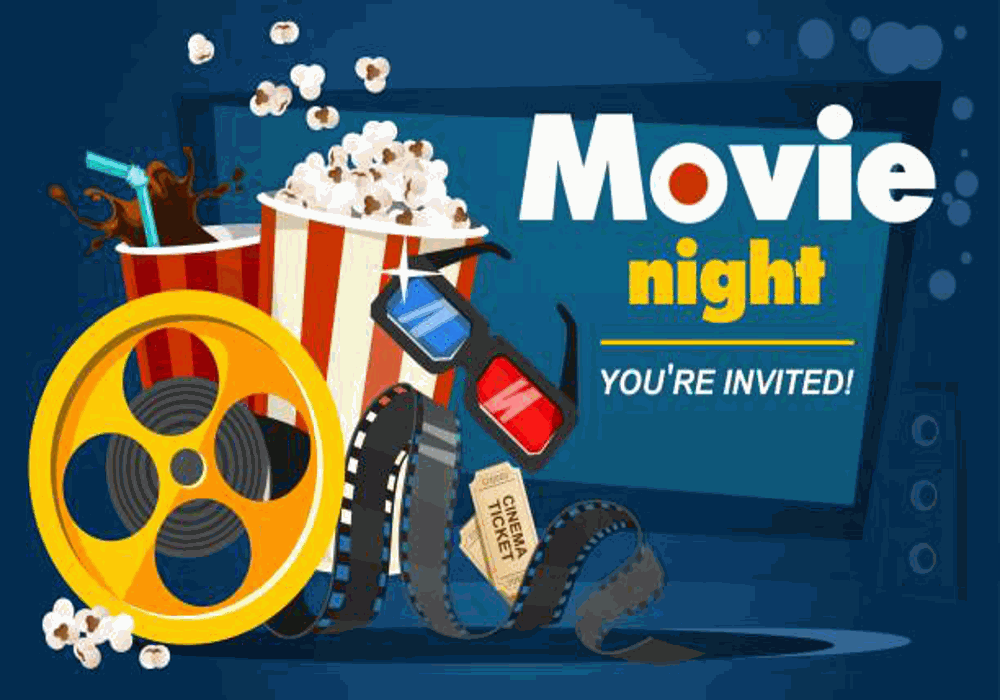

In [103]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('invite.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 1000, 700
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif01.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)
from IPython.display import Image
with open('my_gif01.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

# Vectorization & Measuring Techniques

## Attempt 1 - Base Model with tf-idf vectorizer

In [104]:
# Define a TF-IDF Vectorizer Object. Remove all English stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)

# Create a new column in your dataframe by concatenating the relevant columns
merged_df['combined_features'] = merged_df['overview_clean'] + ' ' 
+ merged_df['keywords_clean'] + ' ' + merged_df['character_clean'] + ' ' 
+ merged_df['actors_clean'] + ' ' + merged_df['genres_clean'] + ' ' + merged_df['title_clean'] + ' ' 
+ merged_df['director_clean'] + ' ' + merged_df['production_companies_clean'] + ' ' + merged_df['tagline']

# Replace NaN with an empty string
merged_df = merged_df.fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(merged_df['combined_features'])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

(4802, 5000)


In [105]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [106]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

In [107]:
# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

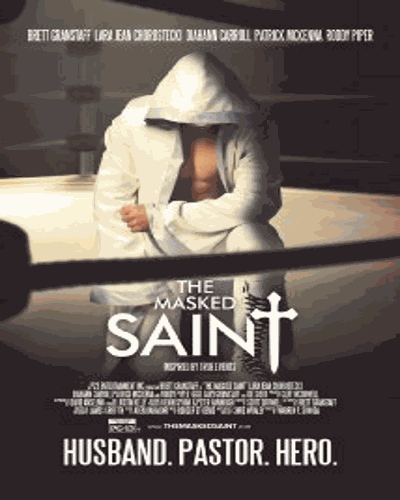

3849                        The Masked Saint
1562             Rugrats in Paris: The Movie
503     The Adventures of Rocky & Bullwinkle
1329    What to Expect When You're Expecting
1293                           Frankenweenie
1380                The Man in the Iron Mask
543                               Monkeybone
4668           The Beast from 20,000 Fathoms
469                      The Legend of Zorro
3557                      Jackass: The Movie
Name: title_credits.df, dtype: object


In [108]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('masked.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

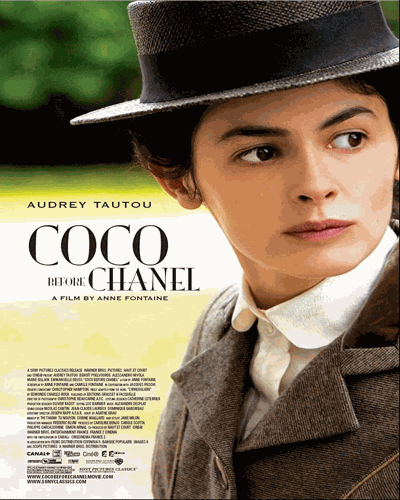

2009                          Coco Before Chanel
1590                                   Atonement
488                    Arthur and the Invisibles
4359                    Martha Marcy May Marlene
3366                                A Single Man
3149                                      Volver
3863                                      August
3785                                      Prison
0                                         Avatar
1       Pirates of the Caribbean: At World's End
Name: title_credits.df, dtype: object


In [109]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('Coco.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif1.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif1.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

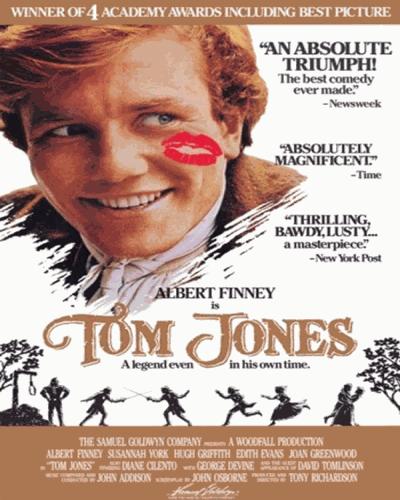

4334                           Tom Jones
4702                             Tadpole
1291            The Time Traveler's Wife
2299                           Leap Year
1714                         Serendipity
3100                     The Brown Bunny
3530                             Don Jon
459     Spirit: Stallion of the Cimarron
2566                     All About Steve
244                          San Andreas
Name: title_credits.df, dtype: object


In [110]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('Jones.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif2.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif2.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))

## Attempt 2 - tf-idf vectorizer with hyperparameter tuning

In [111]:
# taking a closer look at data
merged_df.head(3)

,budget,original_language,original_title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,title_credits.df,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean,combined_features
0,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Avatar,avatar,22nd centuri parapleg marin dispatch moon pandora uniqu mission becom torn follow order protect ...,cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe...,jake sulli neytiri dr grace augustin col quaritch trudi chacon selfridg norm spellman moat eytuk...,sam worthington zoe saldana sigourney weaver stephen lang michel rodriguez giovanni ribisi joel ...,action adventur fantasi scienc fiction,jame cameron,ingeni film partner twentieth centuri fox film corpor dune entertain lightstorm entertain,22nd centuri parapleg marin dispatch moon pandora uniqu mission becom torn follow order protect ...
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,pirat caribbean world end,captain barbossa long believ dead come back life head edg earth turner elizabeth swann noth quit...,ocean drug abus exot island east india trade compani love one life traitor shipwreck strong woma...,captain jack sparrow turner elizabeth swann william bootstrap bill turner captain sao feng capta...,johnni depp orlando bloom keira knightley stellan skarsgård chow yunfat bill nighi geoffrey rush...,adventur fantasi action,gore verbinski,walt disney pictur jerri bruckheim film second mate product,captain barbossa long believ dead come back life head edg earth turner elizabeth swann noth quit...
2,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Spectre,spectr,cryptic messag bond past send trail uncov sinist organ battl polit forc keep secret servic aliv ...,spi base novel secret agent sequel mi6 british secret servic unit kingdom,jame bond blofeld madelein lucia q moneypenni hinx c tanner mr white marco sciarra estrella mexi...,daniel craig christoph waltz léa seydoux ralph fienn monica bellucci ben whishaw naomi harri dav...,action adventur crime,sam mend,columbia pictur danjaq b24,cryptic messag bond past send trail uncov sinist organ battl polit forc keep secret servic aliv ...


In [112]:
# examine movies we're recommending with
merged_df.loc[merged_df['title_credits.df'] == 'The Dark Knight']

,budget,original_language,original_title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,title_credits.df,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean,combined_features
65,185000000,en,The Dark Knight,187.322927,2008-07-16,1004558444,152.0,Why So Serious?,8.2,12002,The Dark Knight,dark knight,menac known joker wreak havoc chao peopl gotham batman must accept one greatest psycholog physic...,dc comic crime fighter secret ident scarecrow sadism chao gotham citi vigilant joker superhero b...,bruce wayn joker harvey dent alfr rachel gordon luciu fox ramirez wuertz scarecrow lau mayor mar...,christian bale heath ledger aaron eckhart michael cain maggi gyllenha gari oldman morgan freeman...,drama action crime thriller,christoph nolan,dc comic legendari pictur warner bro dc entertain syncopi,menac known joker wreak havoc chao peopl gotham batman must accept one greatest psycholog physic...


In [113]:
# examine movies we're recommending with
merged_df.loc[merged_df['title_credits.df'] == 'The Shawshank Redemption']

,budget,original_language,original_title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,title_credits.df,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean,combined_features
1881,25000000,en,The Shawshank Redemption,136.747729,1994-09-23,28341469,142.0,Fear can hold you prisoner. Hope can set you free.,8.5,8205,The Shawshank Redemption,shawshank redempt,cours sever year two convict form friendship seek consol eventu redempt basic compass,prison corrupt polic brutal prison cell delinqu parol board escap prison wrong imprison frame mu...,andi dufresn elli boyd red red warden samuel norton captain byron hadley bog diamond brook hatle...,tim robbin morgan freeman bob gunton clanci brown mark rolston jame whitmor gil bellow william s...,drama crime,frank darabont,castl rock entertain,cours sever year two convict form friendship seek consol eventu redempt basic compass


In [114]:
# inspecting the text for shawshank redemption
print('\n''Overview :', merged_df.loc[1881, 'overview_clean'])

print('\n''Keywords :', merged_df.loc[1881, 'keywords_clean'])

print('\n''Characters :', merged_df.loc[1881, 'character_clean'])

print('\n'' Actors :', merged_df.loc[1881, 'actors_clean'])

print('\n'' Genres :', merged_df.loc[1881, 'genres_clean'])

print('\n'' Titles :', merged_df.loc[1881, 'title_clean'])

print('\n'' Production Companies :', merged_df.loc[1881, 'production_companies_clean'])

print('\n'' Tagline :', merged_df.loc[1881, 'tagline'])


Overview : cours sever year two convict form friendship seek consol eventu redempt basic compass

Keywords : prison corrupt polic brutal prison cell delinqu parol board escap prison wrong imprison frame murder 1940

Characters : andi dufresn elli boyd red red warden samuel norton captain byron hadley bog diamond brook hatlen tommi heywood 1946 da skeet jigger floyd snooz erni guard mert guard trout andi dufresn wife glenn quentin 1946 judg 1947 parol hear man fresh fish con hungri fish con fat ass tyrel rooster guard youngblood guard dekin guard wiley 1954 landladi head bull haig 1954 foodway manag elmo blatch bullhorn tower guard bugl editor 1967 parol hear man ned grime con uncredit polic offic uncredit inmat uncredit inmat ii uncredit frank uncredit pete

 Actors : tim robbin morgan freeman bob gunton clanci brown mark rolston jame whitmor gil bellow william sadler jeffrey demunn larri brandenburg neil giuntoli brian libbi david proval joseph ragno jude ciccolella paul mccrane rene

In [115]:
# inspecting the text for the dark knight
print('\n''Overview :', merged_df.loc[65, 'overview_clean'])

print('\n''Keywords :', merged_df.loc[65, 'keywords_clean'])

print('\n''Characters :', merged_df.loc[65, 'character_clean'])

print('\n'' Actors :', merged_df.loc[65, 'actors_clean'])

print('\n'' Genres :', merged_df.loc[65, 'genres_clean'])

print('\n'' Titles :', merged_df.loc[65, 'title_clean'])

print('\n'' Production Companies :', merged_df.loc[65, 'production_companies_clean'])

print('\n'' Tagline :', merged_df.loc[65, 'tagline'])


Overview : menac known joker wreak havoc chao peopl gotham batman must accept one greatest psycholog physic test abil fight injustic

Keywords : dc comic crime fighter secret ident scarecrow sadism chao gotham citi vigilant joker superhero base comic book tragic hero organ crime crimin mastermind district attorney imax super villain super power batman

Characters : bruce wayn joker harvey dent alfr rachel gordon luciu fox ramirez wuertz scarecrow lau mayor maroni chechen engel stephen loeb rees barbara gordon jame gordon rossi dopey happi gambol grumpi chuckl bank manag drug dealer drug buyer junki natascha crime boss lsi vp judg surrillo brian man 1 man 2 assist da thug parti gentleman parti male guest femal guest judg freel maroni mistress gambol bodyguard chucki venn gambol bodyguard winston elli joker thug report heckler cop heckler act commission offic intersect convoy leader fat thug murphi cop fat thug medic cop 250 52nd st nurs polk berg cop hospit bartend civilian first mate 

In [116]:
# Define a TF-IDF Vectorizer Object for each column with different n-gram ranges and max features
tfidf_overview = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=5000)
tfidf_keywords = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=30)
tfidf_characters = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)
tfidf_actors = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=20)
tfidf_genres = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=20)
tfidf_title_credits = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)
tfidf_production_companies = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=30)

# Fit each column separately and transform into a matrix
tfidf_overview_matrix = tfidf_overview.fit_transform(merged_df['overview_clean'])
tfidf_keywords_matrix = tfidf_keywords.fit_transform(merged_df['keywords_clean'])
tfidf_characters_matrix = tfidf_characters.fit_transform(merged_df['character_clean'])
tfidf_actors_matrix = tfidf_actors.fit_transform(merged_df['actors_clean'])
tfidf_genres_matrix = tfidf_genres.fit_transform(merged_df['genres_clean'])
tfidf_title_credits_matrix = tfidf_title_credits.fit_transform(merged_df['title_credits.df'])
tfidf_production_companies_matrix = tfidf_production_companies.fit_transform(merged_df['production_companies_clean'])

# Combine the matrices horizontally
tfidf_matrix = hstack([tfidf_overview_matrix, tfidf_keywords_matrix, tfidf_characters_matrix,
                       tfidf_actors_matrix, tfidf_genres_matrix, tfidf_title_credits_matrix, 
                       tfidf_production_companies_matrix])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

(4802, 5300)


In [117]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

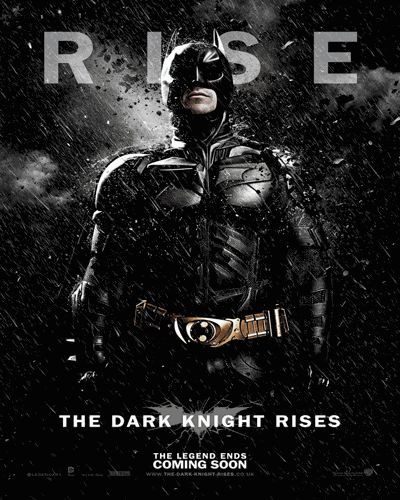

3                         The Dark Knight Rises
119                               Batman Begins
370                            Now You See Me 2
1328                                   The Town
1557                        Million Dollar Baby
580                          Olympus Has Fallen
850                              Chain Reaction
3854    Batman: The Dark Knight Returns, Part 2
2348                                  127 Hours
9            Batman v Superman: Dawn of Justice
Name: title_credits.df, dtype: object


In [118]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('knight.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif3.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif3.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

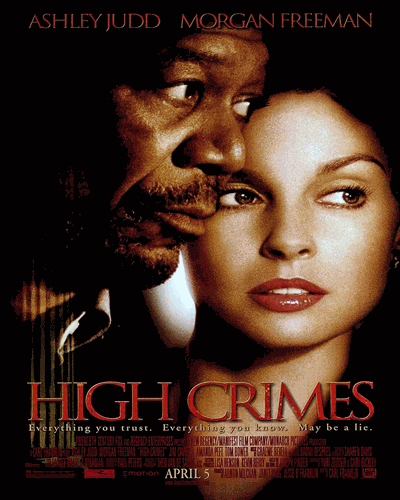

1127                                       High Crimes
65                                     The Dark Knight
1946    The Bad Lieutenant: Port of Call - New Orleans
1699                               Along Came a Spider
4431                                 On the Waterfront
849                                         Changeling
1553                                             Se7en
351                                       The Departed
370                                   Now You See Me 2
4225                                       Nine Queens
Name: title_credits.df, dtype: object


In [119]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('crimes.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif4.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif4.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

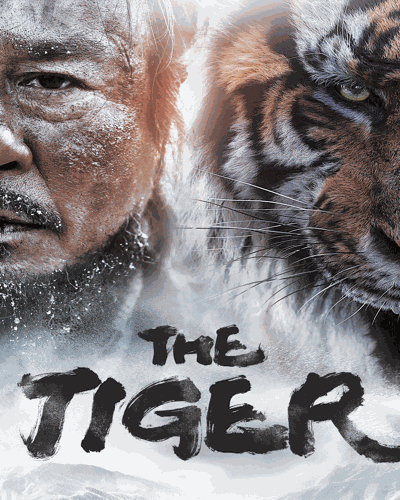

2119     The Tigger Movie
55                  Brave
1695              Aladdin
2116    The Jungle Book 2
352                 Mulan
6                 Tangled
812            Pocahontas
88             Big Hero 6
339       The Incredibles
89         Wreck-It Ralph
Name: title_credits.df, dtype: object


In [120]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('tiger.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif5.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif5.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))

## Attempt 3 - 2nd Base Model with CountVectorizer

In [121]:
# Define a CountVectorizer Object. Remove all English stop words such as 'the', 'a'
count = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=5000)

# Create a new column in your dataframe by concatenating the relevant columns
merged_df['combined_features'] = merged_df['overview_clean'] + ' ' 
+ merged_df['keywords_clean'] + ' ' + merged_df['character_clean'] + ' ' 
+ merged_df['actors_clean'] + ' ' + merged_df['genres_clean'] + ' ' + merged_df['title_clean'] + ' ' 
+ merged_df['director_clean'] + ' ' + merged_df['production_companies_clean'] + ' ' + merged_df['tagline']

# Replace NaN with an empty string
merged_df = merged_df.fillna('')

# Construct the required CountVectorizer matrix by fitting and transforming the data
count_matrix = count.fit_transform(merged_df['combined_features'])

# Output the shape of count_matrix
print(count_matrix.shape)

(4802, 5000)


In [122]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(count_matrix, count_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

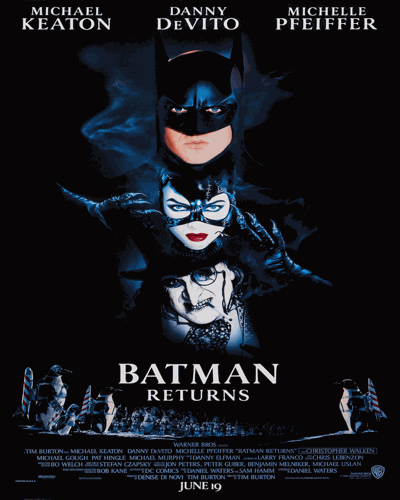

428                         Batman Returns
2288                          Fight Valley
3                    The Dark Knight Rises
274                              Gladiator
3557                    Jackass: The Movie
4668         The Beast from 20,000 Fathoms
9       Batman v Superman: Dawn of Justice
59                                    2012
155                 Fun with Dick and Jane
299                         Batman Forever
Name: title_credits.df, dtype: object


In [123]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('returns.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif6.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif6.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

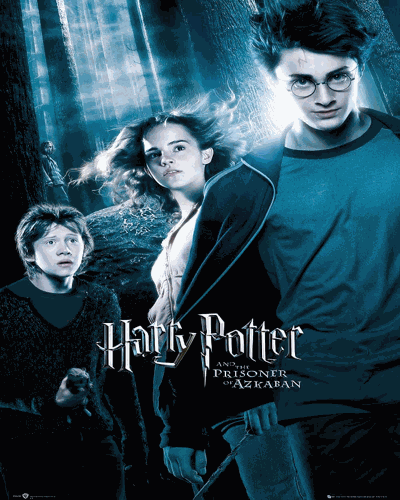

191     Harry Potter and the Prisoner of Azkaban
316                            Gangs of New York
399                                  Open Season
488                    Arthur and the Invisibles
1798                              New Year's Eve
1981                                  Piranha 3D
2009                          Coco Before Chanel
2176                                 Simon Birch
2205                                  Undisputed
2900                     Space Battleship Yamato
Name: title_credits.df, dtype: object


In [124]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('potter.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif7.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif7.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

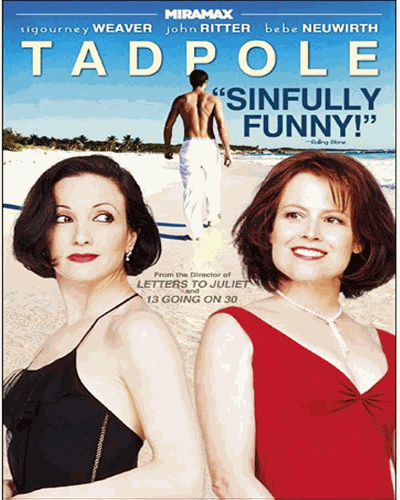

4702                     Tadpole
1669                 The Promise
610       The Legend of Hercules
3373    The Other Side of Heaven
2797      Lars and the Real Girl
709                Eat Pray Love
2481                 How to Deal
1867             Good Luck Chuck
2299                   Leap Year
4123              Roadside Romeo
Name: title_credits.df, dtype: object


In [125]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('Tadpole.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif8.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif8.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))

## Attempt 4 - CountVectorizer with Hyperparameter Tuning

In [126]:
# Define a Count Vectorizer Object for each column with different n-gram ranges and max features
count_overview = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=5000)
count_keywords = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=3000)
count_characters = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=1000)
count_actors = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=2000)
count_genres = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=2000)
count_title_credits = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
count_production_companies = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=300)

# Fit each column separately and transform into a matrix
count_overview_matrix = count_overview.fit_transform(merged_df['overview_clean'])
count_keywords_matrix = count_keywords.fit_transform(merged_df['keywords_clean'])
count_characters_matrix = count_characters.fit_transform(merged_df['character_clean'])
count_actors_matrix = count_actors.fit_transform(merged_df['actors_clean'])
count_genres_matrix = count_genres.fit_transform(merged_df['genres_clean'])
count_title_credits_matrix = count_title_credits.fit_transform(merged_df['title_credits.df'])
count_production_companies_matrix = count_production_companies.fit_transform(merged_df['production_companies_clean'])

# Combine the matrices horizontally
count_matrix = hstack([count_overview_matrix, count_keywords_matrix, count_characters_matrix,
                       count_actors_matrix, count_genres_matrix, count_title_credits_matrix, 
                       count_production_companies_matrix])

# Output the shape of count_matrix
print(count_matrix.shape)

(4802, 12322)


In [127]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(count_matrix, count_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

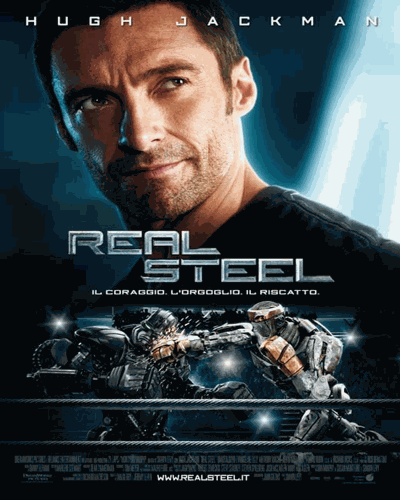

257                     Real Steel
4199    You Can't Take It With You
37      Oz: The Great and Powerful
4328                    Casablanca
370               Now You See Me 2
3            The Dark Knight Rises
158                      Star Trek
5                     Spider-Man 3
2912                     Star Wars
3886         It's a Wonderful Life
Name: title_credits.df, dtype: object


In [128]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('steel.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif9.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif9.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

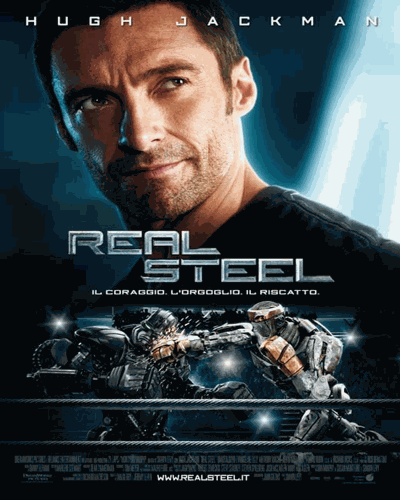

257                     Real Steel
4199    You Can't Take It With You
37      Oz: The Great and Powerful
370               Now You See Me 2
4328                    Casablanca
3            The Dark Knight Rises
158                      Star Trek
2912                     Star Wars
5                     Spider-Man 3
3886         It's a Wonderful Life
Name: title_credits.df, dtype: object


In [129]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('steel.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif10.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif10.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

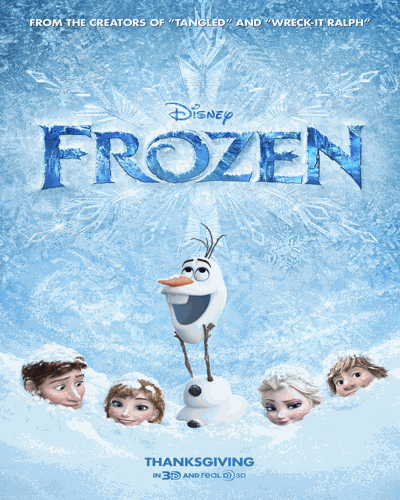

124                    Frozen
89             Wreck-It Ralph
231            Monsters, Inc.
88                 Big Hero 6
339           The Incredibles
144     Mr. Peabody & Sherman
506           Despicable Me 2
42                Toy Story 3
2207                12 Rounds
614             Despicable Me
Name: title_credits.df, dtype: object


In [130]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('Frozen.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif11.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif11.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))

## Attempt 5 - Attempt 2 Iteration with Production Companies

In [131]:
print('\n''Overview :', merged_df.loc[65, 'overview_clean'])

print('\n''Keywords :', merged_df.loc[65, 'keywords_clean'])

print('\n''Characters :', merged_df.loc[65, 'character_clean'])

print('\n'' Actors :', merged_df.loc[65, 'actors_clean'])

print('\n'' Genres :', merged_df.loc[65, 'genres_clean'])

print('\n'' Titles :', merged_df.loc[65, 'title_clean'])

print('\n'' Production Companies :', merged_df.loc[65, 'production_companies_clean'])

print('\n'' Tagline :', merged_df.loc[65, 'tagline'])


Overview : menac known joker wreak havoc chao peopl gotham batman must accept one greatest psycholog physic test abil fight injustic

Keywords : dc comic crime fighter secret ident scarecrow sadism chao gotham citi vigilant joker superhero base comic book tragic hero organ crime crimin mastermind district attorney imax super villain super power batman

Characters : bruce wayn joker harvey dent alfr rachel gordon luciu fox ramirez wuertz scarecrow lau mayor maroni chechen engel stephen loeb rees barbara gordon jame gordon rossi dopey happi gambol grumpi chuckl bank manag drug dealer drug buyer junki natascha crime boss lsi vp judg surrillo brian man 1 man 2 assist da thug parti gentleman parti male guest femal guest judg freel maroni mistress gambol bodyguard chucki venn gambol bodyguard winston elli joker thug report heckler cop heckler act commission offic intersect convoy leader fat thug murphi cop fat thug medic cop 250 52nd st nurs polk berg cop hospit bartend civilian first mate 

In [132]:
print('\n''Overview :', merged_df.loc[1881, 'overview_clean'])

print('\n''Keywords :', merged_df.loc[1881, 'keywords_clean'])

print('\n''Characters :', merged_df.loc[1881, 'character_clean'])

print('\n'' Actors :', merged_df.loc[1881, 'actors_clean'])

print('\n'' Genres :', merged_df.loc[1881, 'genres_clean'])

print('\n'' Titles :', merged_df.loc[1881, 'title_clean'])

print('\n'' Production Companies :', merged_df.loc[1881, 'production_companies_clean'])

print('\n'' Tagline :', merged_df.loc[1881, 'tagline'])


Overview : cours sever year two convict form friendship seek consol eventu redempt basic compass

Keywords : prison corrupt polic brutal prison cell delinqu parol board escap prison wrong imprison frame murder 1940

Characters : andi dufresn elli boyd red red warden samuel norton captain byron hadley bog diamond brook hatlen tommi heywood 1946 da skeet jigger floyd snooz erni guard mert guard trout andi dufresn wife glenn quentin 1946 judg 1947 parol hear man fresh fish con hungri fish con fat ass tyrel rooster guard youngblood guard dekin guard wiley 1954 landladi head bull haig 1954 foodway manag elmo blatch bullhorn tower guard bugl editor 1967 parol hear man ned grime con uncredit polic offic uncredit inmat uncredit inmat ii uncredit frank uncredit pete

 Actors : tim robbin morgan freeman bob gunton clanci brown mark rolston jame whitmor gil bellow william sadler jeffrey demunn larri brandenburg neil giuntoli brian libbi david proval joseph ragno jude ciccolella paul mccrane rene

In [133]:
# examining the top result for frozen recommendation
merged_df.loc[merged_df['title_credits.df'] == 'The Prince of Egypt']

,budget,original_language,original_title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,title_credits.df,title_clean,overview_clean,keywords_clean,character_clean,actors_clean,genres_clean,director_clean,production_companies_clean,combined_features
698,70000000,en,The Prince of Egypt,29.464852,1998-12-15,218613188,99.0,The Power Is Real.,6.8,817,The Prince of Egypt,princ egypt,extraordinari tale two brother name mose rams one born royal blood one orphan secret past grow b...,mose egypt pyramid exodu kingdom govern ancient egypt hebrew pharaoh woman director,mosesgod ramess ii pharaoh seti zipporah miriam aaron jethro queen hotep huy addit voic mose sin...,val kilmer ralph fienn patrick stewart michel pfeiffer sandra bullock jeff goldblum danni glover...,adventur anim drama famili music,simon well steve hickner brenda chapman,dreamwork skg dreamwork anim,extraordinari tale two brother name mose rams one born royal blood one orphan secret past grow b...


In [134]:
merged_df.loc[merged_df['title_credits.df'] == 'Frozen']

print('\n''Overview :', merged_df.loc[124, 'overview_clean'])

print('\n''Keywords :', merged_df.loc[124, 'keywords_clean'])

print('\n''Characters :', merged_df.loc[124, 'character_clean'])

print('\n'' Actors :', merged_df.loc[124, 'actors_clean'])

print('\n'' Genres :', merged_df.loc[124, 'genres_clean'])

print('\n'' Titles :', merged_df.loc[124, 'title_clean'])

print('\n'' Production Companies :', merged_df.loc[124, 'production_companies_clean'])

print('\n'' Tagline :', merged_df.loc[124, 'tagline'])


Overview : young princess anna arendel dream find true love sister elsa coron fate take danger journey attempt end etern winter fallen kingdom she accompani ice deliveri man kristoff reindeer sven snowman olaf adventur find friendship courag famili true love realli mean

Keywords : queen music princess betray snowman anim reindeer curs snow troll mountain climber aftercreditssting woman director 3d

Characters : anna voic elsa voic kristoff voic olaf voic han voic duke voic pabbi grandpa voic oaken voic kai voic bulda voic gerda voic bishop voic king voic young anna voic young elsa voic teen elsa voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit voic voic addit 

In [135]:
# Define a TF-IDF Vectorizer Object for each column with different n-gram ranges and max features
tfidf_overview = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=5000)
tfidf_keywords = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=50) #great
tfidf_characters = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)# maybe
tfidf_actors = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=50) 
tfidf_genres = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=20) # maybe 
tfidf_title = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=500) # 4 batmans
tfidf_companies = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=10) # fine
tfidf_tagline = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=300)

# Fit each column separately and transform into a matrix
tfidf_overview_matrix = tfidf_overview.fit_transform(merged_df['overview_clean'])
tfidf_keywords_matrix = tfidf_keywords.fit_transform(merged_df['keywords_clean'])
tfidf_characters_matrix = tfidf_characters.fit_transform(merged_df['character_clean'])
tfidf_actors_matrix = tfidf_actors.fit_transform(merged_df['actors_clean'])
tfidf_genres_matrix = tfidf_genres.fit_transform(merged_df['genres_clean'])
tfidf_title_matrix = tfidf_title.fit_transform(merged_df['title_clean'])
tfidf_companies_matrix = tfidf_companies.fit_transform(merged_df['production_companies_clean'])
tfidf_tagline_matrix = tfidf_tagline.fit_transform(merged_df['tagline'])

# Combine the matrices horizontally with weights
tfidf_matrix = hstack([tfidf_overview_matrix * 2.0, tfidf_keywords_matrix, tfidf_characters_matrix,
                       tfidf_actors_matrix, tfidf_genres_matrix, tfidf_title_matrix, tfidf_companies_matrix,
                       tfidf_tagline_matrix])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

(4802, 6030)


In [136]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

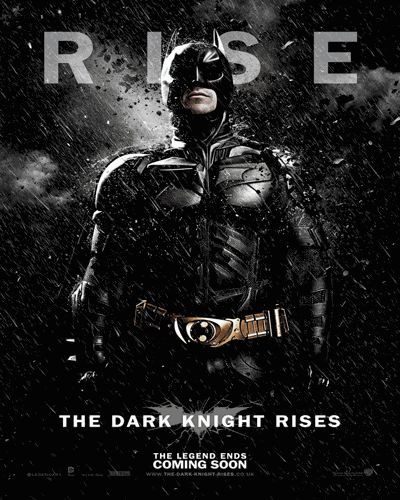

3                         The Dark Knight Rises
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
1557                        Million Dollar Baby
1328                                   The Town
1445                                   Whiteout
370                            Now You See Me 2
3849                           The Masked Saint
72                                Suicide Squad
Name: title_credits.df, dtype: object


In [137]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('knight.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif12.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif12.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

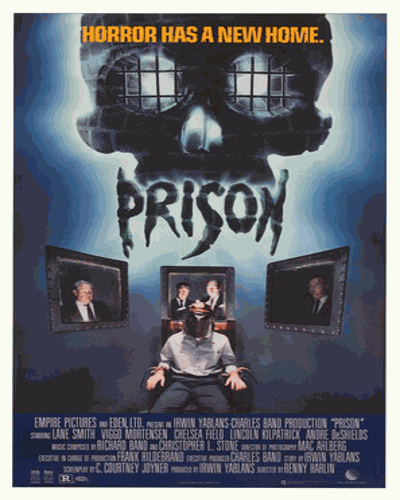

3785                   Prison
3242     Escape from Alcatraz
65            The Dark Knight
388            Ocean's Eleven
3149                   Volver
1127              High Crimes
370          Now You See Me 2
119             Batman Begins
3       The Dark Knight Rises
434          The Longest Yard
Name: title_credits.df, dtype: object


In [138]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('prison.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif13.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif13.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

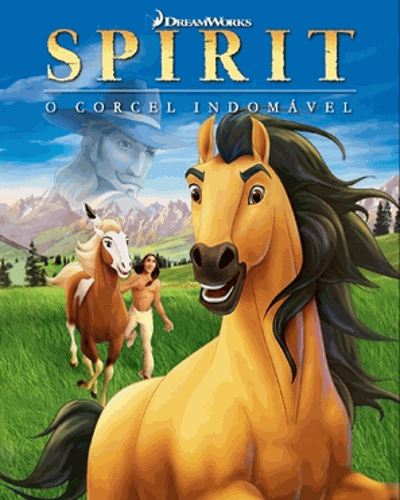

459     Spirit: Stallion of the Cimarron
4334                           Tom Jones
1695                             Aladdin
1714                         Serendipity
698                  The Prince of Egypt
86                   Shrek Forever After
89                        Wreck-It Ralph
152                      Kung Fu Panda 3
504              The Secret Life of Pets
144                Mr. Peabody & Sherman
Name: title_credits.df, dtype: object


In [139]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('spirit.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif14.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif14.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))

## Attempt 6 - Model with tf-idf with Director: The Best Result

In [140]:
# Define a TF-IDF Vectorizer Object for each column with different n-gram ranges and max features
tfidf_overview = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=5000)
tfidf_keywords = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=50)
tfidf_characters = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)
tfidf_actors = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=50)
tfidf_genres = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=20)
tfidf_title = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=500)
tfidf_companies = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=10)
tfidf_tagline = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=300)
tfidf_director = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50)

# Fit each column separately and transform into a matrix
tfidf_overview_matrix = tfidf_overview.fit_transform(merged_df['overview_clean'])
tfidf_keywords_matrix = tfidf_keywords.fit_transform(merged_df['keywords_clean'])
tfidf_characters_matrix = tfidf_characters.fit_transform(merged_df['character_clean'])
tfidf_actors_matrix = tfidf_actors.fit_transform(merged_df['actors_clean'])
tfidf_genres_matrix = tfidf_genres.fit_transform(merged_df['genres_clean'])
tfidf_title_matrix = tfidf_title.fit_transform(merged_df['title_clean'])
tfidf_companies_matrix = tfidf_companies.fit_transform(merged_df['production_companies_clean'])
tfidf_tagline_matrix = tfidf_tagline.fit_transform(merged_df['tagline'])
tfidf_director_matrix = tfidf_director.fit_transform(merged_df['director_clean'])

# Combine the matrices horizontally with weights
tfidf_matrix = hstack([tfidf_overview_matrix, tfidf_keywords_matrix, tfidf_characters_matrix,
                       tfidf_actors_matrix, tfidf_genres_matrix, tfidf_title_matrix, tfidf_companies_matrix,
                       tfidf_tagline_matrix, tfidf_director_matrix * 0.52])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

(4802, 6080)


In [141]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title_credits.df']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title_credits.df'].iloc[movie_indices]

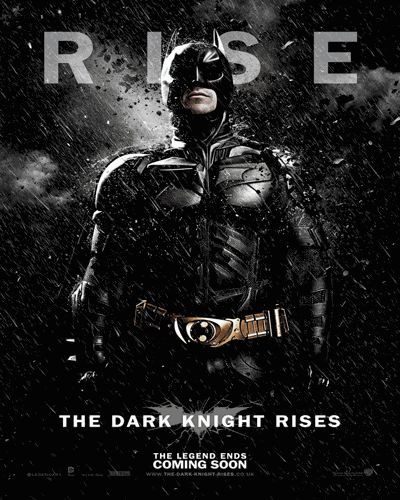

3                         The Dark Knight Rises
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
1557                        Million Dollar Baby
1328                                   The Town
1445                                   Whiteout
370                            Now You See Me 2
72                                Suicide Squad
351                                The Departed
Name: title_credits.df, dtype: object


In [142]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('knight.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif15.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif15.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Dark Knight'))

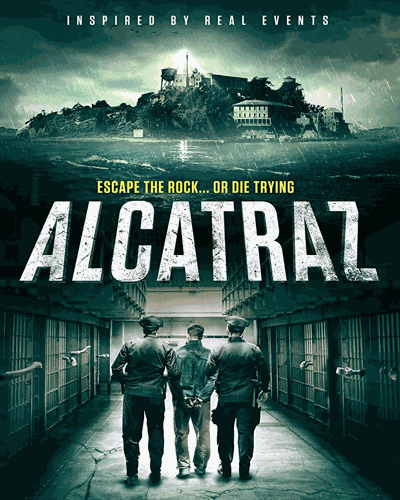

3242     Escape from Alcatraz
65            The Dark Knight
388            Ocean's Eleven
1127              High Crimes
370          Now You See Me 2
119             Batman Begins
3785                   Prison
3       The Dark Knight Rises
434          The Longest Yard
690            The Green Mile
Name: title_credits.df, dtype: object


In [143]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('escape.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif16.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif16.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('The Shawshank Redemption'))

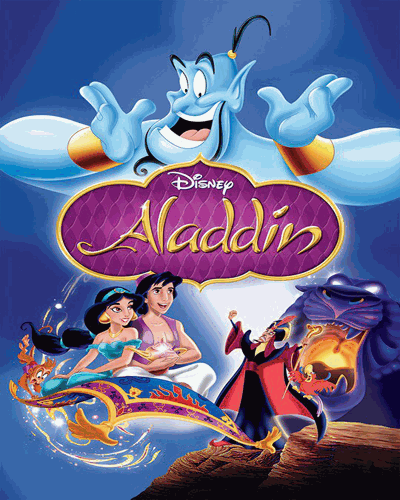

1695                    Aladdin
504     The Secret Life of Pets
698         The Prince of Egypt
89               Wreck-It Ralph
152             Kung Fu Panda 3
144       Mr. Peabody & Sherman
42                  Toy Story 3
88                   Big Hero 6
546                     Minions
181               Kung Fu Panda
Name: title_credits.df, dtype: object


In [144]:
from PIL import Image
# Open the JPEG image
image1 = Image.open('Aladdin.jpg')
# Convert the JPEG images to RGBA mode
image1 = image1.convert('RGBA')
# Set the size of the images
width, height = 400, 500
# Resize the images
image1 = image1.resize((width, height))
# Create a list of frames for the GIF
frames = [image1]
# Save the frames as a GIF
frames[0].save('my_gif17.gif', format='GIF', append_images=frames[1:], save_all=True, loop=0)

from IPython.display import Image
with open('my_gif17.gif','rb') as f1:
    image1 = Image(data=f1.read(), format='png')
display(image1)

print(get_movie_recommendations('Frozen'))